In [1]:
#2D /3D Meep Ring Resonator Ethanol Sensor Simulation
import meep as mp 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
resolution = 40 

In [3]:
sx = 50 #simulation area
sy = 50
sz = 6
cell_size = mp.Vector3(sx,sy,sz)

In [4]:
dpml = 1.0  #pml region set
boundary_layers = [mp.PML(thickness=dpml)]

In [5]:
wl = 2.090 #source center wavelength um
fcen = 1/wl
df = 0.05*fcen #source bandwidth

#Parameter
ring_outer_radius = 16  # outer radius of the ring
ring_width = 1  # width of the ring
ring_inner_radius = ring_outer_radius - ring_width  # inner radius of the ring
wg_width = 1  # width of the waveguide
gap = 0.5  # gap between waveguide and ring (side to side)

# used for 2D model based on first step effective index 
#ring = mp.Medium(index=1.6945)#Core of ring EI water+ethanol
ring = mp.Medium(index=1.6943) #Core of ring EI pure water
bus = mp.Medium(index=1.7078) #Core of bus EI 
CaF2 = mp.Medium(index=1.4235) #Surrounding material 


# used for 3D model
# #H2O = mp.Medium(index=1.3041) # Water with 5% alochol
# H2O = mp.Medium(index=1.3020) #Pure water no alcohol
# Si3N4 = mp.Medium(index=1.9810) #Core of bus and ring
# CaF2 = mp.Medium(index=1.4235) #Surrounding material

geometry = []

#ring
#Cylinder for the ring
geometry.append(mp.Cylinder(radius=ring_outer_radius,
                         height=0.5,
                         center=mp.Vector3(0,0,0.5/2),
                         axis=mp.Vector3(0,0,1),
                         material=ring))
#CaF2 hole within the cylinder
geometry.append(mp.Cylinder(radius=ring_inner_radius,
                         height=0.5,
                         center=mp.Vector3(0,0,0.5/2),
                         axis=mp.Vector3(0,0,1),
                         material=CaF2))

#used for 3D model
# # sensing material cylinder
# geometry.append(mp.Cylinder(radius=ring_outer_radius,
#                          height=1,
#                          center=mp.Vector3(0,0,0.5+1/2),
#                          axis=mp.Vector3(0,0,1),
#                          material=H2O))

#Bus waveguide
geometry.append(mp.Block(size=mp.Vector3(mp.inf, wg_width, 0.5),
                         center=mp.Vector3(0, -ring_outer_radius - wg_width/2 - gap, 0.5/2),
                         material=bus))



In [6]:
sources = [mp.EigenModeSource(src=mp.GaussianSource(frequency=fcen, fwidth=df),
                              size=mp.Vector3(0,wg_width,0.5),
                              center=mp.Vector3(-23, -ring_outer_radius - wg_width/2 - gap, 0.5/2),
                              eig_band=1,
                              eig_parity=mp.ODD_Z, 
                              eig_match_freq=True)]

In [20]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=boundary_layers,
                    geometry=geometry,
                    dimensions=2, # switch of 2/3D model (dimensions=2 for 2D, dimensions=3 for 3D)
                    default_material=CaF2,#set Surrounding material 
                    sources=sources)

In [8]:
input_fr = mp.FluxRegion(size=mp.Vector3(0,wg_width*1.2,0.5*1.2),
                         center=mp.Vector3(-20,-ring_outer_radius - wg_width/2 - gap, 0.5/2))
output_fr = mp.FluxRegion(size=mp.Vector3(0,wg_width*1.2,0.5*1.2),
                         center=mp.Vector3(20,-ring_outer_radius - wg_width/2 - gap, 0.5/2))
ndf=1000; # number of detection frequency_resolution
fcen_de=1/2.10;#center frequency
input_flx = sim.add_flux(fcen_de, 0.006, ndf, input_fr) # 0.0007
output_flx = sim.add_flux(fcen_de, 0.006, ndf, output_fr)

     cylinder, center = (0,0,0.25)
          radius 16, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.87065,2.87065,2.87065)
     cylinder, center = (0,0,0.25)
          radius 15, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.02635,2.02635,2.02635)
     block, center = (0,-17,0.25)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.91658,2.91658,2.91658)


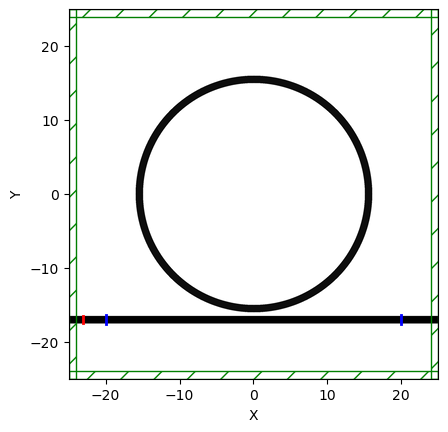

     cylinder, center = (0,0,0.25)
          radius 16, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.87065,2.87065,2.87065)
     cylinder, center = (0,0,0.25)
          radius 15, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.02635,2.02635,2.02635)
     block, center = (0,-17,0.25)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.91658,2.91658,2.91658)


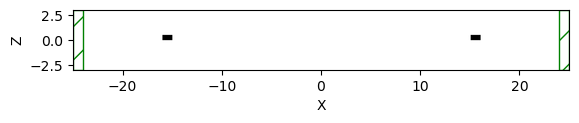

     cylinder, center = (0,0,0.25)
          radius 16, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.87065,2.87065,2.87065)
     cylinder, center = (0,0,0.25)
          radius 15, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.02635,2.02635,2.02635)
     block, center = (0,-17,0.25)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.91658,2.91658,2.91658)


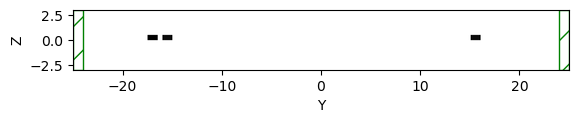

In [9]:
XY = mp.Volume(center=mp.Vector3(),
               size=mp.Vector3(sx,sy,0))
XZ = mp.Volume(center=mp.Vector3(),
               size=mp.Vector3(sx,0,sz))
YZ = mp.Volume(center=mp.Vector3(),
               size=mp.Vector3(0,sy,sz))

sim.plot2D(output_plane=XY)
plt.savefig("XY.png")
plt.show()
sim.plot2D(output_plane=XZ)
plt.savefig("ZX.png")
plt.show()
sim.plot2D(output_plane=YZ)
plt.savefig("ZY.png")
plt.show()

In [10]:
sim.run(until=2000) # simulation period

-----------
Initializing structure...
time for choose_chunkdivision = 0.000777006 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 40
     cylinder, center = (0,0,0.25)
          radius 16, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.87065,2.87065,2.87065)
     cylinder, center = (0,0,0.25)
          radius 15, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.02635,2.02635,2.02635)
     block, center = (0,-17,0.25)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.91658,2.91658,2.91658)
time for set_epsilon = 8.11527 s
-----------
MPB solved for frequency_1(0.817129,0,0) = 0.479592 after 9 iters
MPB solved for frequency_1(0.815215,0,0) = 0.478469 after 4 iters
MPB solved for frequency_1(0.815215,0,0) = 0.478469 after 1 iters
Meep progress: 5.425000000000001/2000.0 = 0.3% done in 4.0s, 1473.1s to go
on time step 434 (time=5

In [12]:
wls = 1/np.array(mp.get_flux_freqs(input_flx))
input_flux = np.array(mp.get_fluxes(input_flx))
output_flux = np.array(mp.get_fluxes(output_flx))

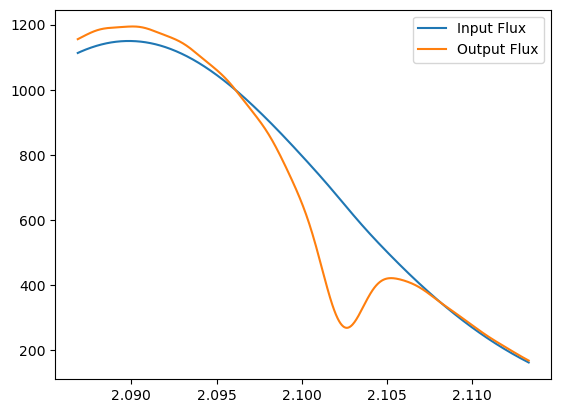

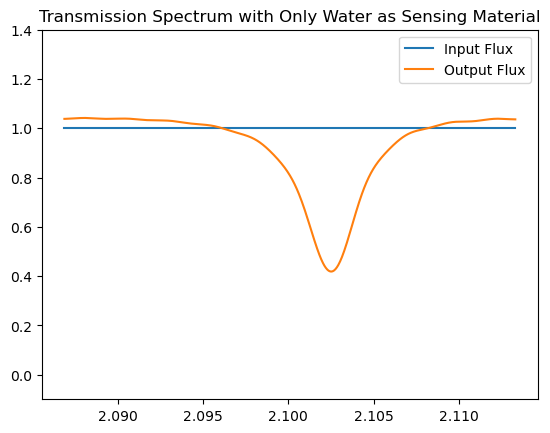

In [18]:
plt.plot(wls,input_flux, label='Input Flux')
plt.plot(wls,output_flux, label="Output Flux")
plt.legend()
plt.show()

plt.title("Transmission Spectrum with Only Water as Sensing Material")
plt.plot(wls,input_flux/input_flux, label='Input Flux')
plt.plot(wls,output_flux/input_flux, label="Output Flux")
plt.ylim(-0.1, 1.4)#(-0.1, 1.4)
plt.legend()
plt.savefig("Meep_TransmissionSp_result_Only_Water_New.png")
plt.show() 

import pandas as pd
# Create a DataFrame
df = pd.DataFrame({'Wavelength': wls,'Output': output_flux/input_flux})

# Export to Excel
df.to_excel('PingSun.xlsx', index=False)




-----------
Initializing structure...
time for choose_chunkdivision = 0.00152397 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 40
     cylinder, center = (0,0,0.25)
          radius 16, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.87065,2.87065,2.87065)
     cylinder, center = (0,0,0.25)
          radius 15, height 0.5, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.02635,2.02635,2.02635)
     block, center = (0,-17,0.25)
          size (1e+20,1,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.91658,2.91658,2.91658)
time for set_epsilon = 8.09687 s
-----------
MPB solved for frequency_1(0.817129,0,0) = 0.479592 after 9 iters
MPB solved for frequency_1(0.815215,0,0) = 0.478469 after 4 iters
MPB solved for frequency_1(0.815215,0,0) = 0.478469 after 1 iters


ValueError: Plane volume must be 2D (a plane).

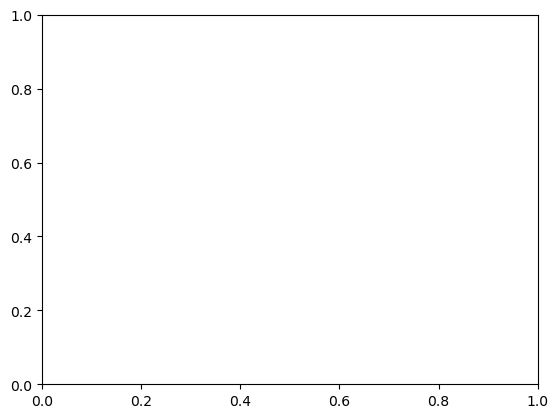

In [21]:
# Setup animation
animation = mp.Animate2D(sim, fields=mp.Ez, realtime=False, normalize=True)

# Run the simulation once and record all data
sim.run(mp.at_every(1, animation), until=800)

# Generate and save the GIF
animation.to_gif(10, filename='simulationxxx.gif')